# Sequential DNN template for k-fold cross validation

The template provides a binary classification, with a confusion matrix. 

## Metrics given:
    Accuracy; For each class: Recall, Precision, F1 score, Specificity, Miss rate, Fall-out, False discovery rate, False omisson rate, Negative predictive value.
    ROC curve.


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras import regularizers, losses
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras_metrics
from keras import optimizers
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Using TensorFlow backend.


In [2]:
# Getting the data
dataset = pd.read_csv('HC_PA_data.csv')
dataset.head()

,ID,Csoport,Nem,SPI.raw_0_0,MFCC.mean_0_0_[E]_1,MFCC.std_0_0_[E]_1,MFCC.range_0_0_[E]_1,HNR.mean_5_5_[E],HNR.std_5_5_[E],HNR.range_5_5_[E],...,IMF_ENTROPY_RATIO.range_0_0_[E-e:-i-2-y],IMF_ENTROPY_RATIO.mean_0_0_[O-A:-o-u],IMF_ENTROPY_RATIO.std_0_0_[O-A:-o-u],IMF_ENTROPY_RATIO.range_0_0_[O-A:-o-u],IMF_ENTROPY_RATIO.mean_0_0_[v-z-Z],IMF_ENTROPY_RATIO.std_0_0_[v-z-Z],IMF_ENTROPY_RATIO.range_0_0_[v-z-Z],IMF_ENTROPY_RATIO.mean_0_0_[b-d-g-dz-dZ-d'],IMF_ENTROPY_RATIO.std_0_0_[b-d-g-dz-dZ-d'],IMF_ENTROPY_RATIO.range_0_0_[b-d-g-dz-dZ-d']
0,PA_002no,PA,no,0.702423,226.727241,15.565275,138.304191,7.702671,1.873980,8.800351,...,2.379776,1.229107,0.297684,1.656664,1.342090,0.599020,2.269212,2.035604,0.885508,3.693024
1,PA_003no,PA,no,0.368337,188.198555,20.797340,127.246116,-3.235416,1.841550,6.213561,...,0.950906,1.054856,0.154813,0.754372,1.022489,0.159252,0.522101,1.098897,0.111197,0.488349
2,PA_004no,PA,no,0.810142,245.252498,13.106253,94.247744,9.765168,1.553110,7.726234,...,2.337904,1.175937,0.285692,1.626280,1.212787,0.271315,0.985533,1.467220,0.332705,1.475147
3,PA_005no,PA,no,1.052086,271.537454,21.658928,129.618586,11.969402,1.212987,5.478905,...,2.311154,1.010327,0.270293,1.332628,1.857653,0.562689,2.146590,1.508461,0.403692,1.557925
4,PA_006no,PA,no,0.739211,249.913724,16.760158,117.845775,2.424641,4.498472,16.214943,...,3.031446,1.277202,0.288863,1.337109,1.138326,0.284632,1.042373,1.441762,0.329920,1.256846


In [3]:
# Shuffle
np.random.seed(40) # random seed is a number (or vector) used to initialize a pseudorandom number generator
dataset = dataset.reindex(np.random.permutation(dataset.index))
dataset.reset_index(inplace=True, drop=True)
dataset.head()

,ID,Csoport,Nem,SPI.raw_0_0,MFCC.mean_0_0_[E]_1,MFCC.std_0_0_[E]_1,MFCC.range_0_0_[E]_1,HNR.mean_5_5_[E],HNR.std_5_5_[E],HNR.range_5_5_[E],...,IMF_ENTROPY_RATIO.range_0_0_[E-e:-i-2-y],IMF_ENTROPY_RATIO.mean_0_0_[O-A:-o-u],IMF_ENTROPY_RATIO.std_0_0_[O-A:-o-u],IMF_ENTROPY_RATIO.range_0_0_[O-A:-o-u],IMF_ENTROPY_RATIO.mean_0_0_[v-z-Z],IMF_ENTROPY_RATIO.std_0_0_[v-z-Z],IMF_ENTROPY_RATIO.range_0_0_[v-z-Z],IMF_ENTROPY_RATIO.mean_0_0_[b-d-g-dz-dZ-d'],IMF_ENTROPY_RATIO.std_0_0_[b-d-g-dz-dZ-d'],IMF_ENTROPY_RATIO.range_0_0_[b-d-g-dz-dZ-d']
0,PA_306ffi,PA,ffi,0.637092,254.776338,17.894653,133.026287,3.662131,2.556470,10.214093,...,1.610031,1.102712,0.189437,1.067470,1.176479,0.214603,0.918067,1.486122,0.410314,1.844149
1,PA_002no,PA,no,0.702423,226.727241,15.565275,138.304191,7.702671,1.873980,8.800351,...,2.379776,1.229107,0.297684,1.656664,1.342090,0.599020,2.269212,2.035604,0.885508,3.693024
2,PA_314no,PA,no,0.212514,171.445459,15.439517,104.878575,-1.934599,1.663508,5.961303,...,0.609060,1.079217,0.147217,0.706425,1.021049,0.148890,0.527549,1.071168,0.064864,0.336441
3,PA_011no,PA,no,0.625797,233.919193,14.568914,115.537516,11.385544,1.461813,6.171432,...,2.606067,1.533281,0.431974,2.333262,1.253793,0.306902,1.001497,1.380122,0.296241,1.318241
4,PA_335ffi,PA,ffi,0.920608,247.686241,15.432377,98.125659,1.091977,2.244823,9.646092,...,2.220722,1.159359,0.326409,1.631736,1.381694,0.373335,1.486330,1.495480,0.290138,1.184415


In [4]:
# Selecting the training attributes(X) and the label(y)
X = dataset.iloc[:, 3:52].values # X = dataset.iloc[:, np.r_[3:52]].values  lets you choose multiple coloumbs
y = dataset.iloc[:,1].values
print(X.shape)
print(y.shape)

(450, 49)
(450,)


In [5]:
# Target label encoding to 0 and 1
labelnames_string = set(y)
labelnames_string = list(labelnames_string)

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

labelnames_int = set(y)
labelnames_int = list(labelnames_int)

print(labelnames_string[0], '=>', labelnames_int[0])
print(labelnames_string[1], '=>', labelnames_int[1])

PA => 0
HC => 1


In [6]:
# Replace NaN values in columns with columns mean values 
from sklearn.preprocessing import Imputer #class
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0) # an instance of the class with these properties
imputer = imputer.fit(X[:, 0:48])         # we have to choose the columns with missing values
X[:, 0:48] = imputer.transform(X[:, 0:48])           # replace the X values for the columns averages

C:\Users\Miklos.AKL\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler # https://jovianlin.io/feature-scaling/
#scaler = StandardScaler()
scaler = MinMaxScaler() 
scaled_data = scaler.fit_transform(X)


In [8]:
def get_sequential_dnn():
    # create model
    classifier = Sequential()  # future ANN classifier, now we initialize the different hidden layers 
    # ReLu activation function for the hidden layers
    # Sigmoid for the final layer
    # Add a dropout layer for input layer
    # More to read about dropout here: http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
    classifier.add(Dropout(0.25, input_shape=(49,)))

    # input layer and the first hidden layer
    #classifier.add(Dense(output_dim = 25, kernel_regularizer = regularizers.l2(0.01), activity_regularizer = regularizers.l1(0.01), init ='uniform', activation = 'relu', input_dim = 49))         
    classifier.add(Dense(output_dim = 25, init ='uniform', activation = 'relu', input_dim = X.shape[1]))         

    # tip: number of nodes in the hidden layers = average (number of nodes in the input layer and the number of nodes in the output layer) 
                                # so output_dim =(49+1)/2 = 25
                                # init -> initialize the weights randomly
                                # input_dim = 49
    classifier.add(Dropout(0.25, noise_shape=None, seed=None)) #Then we simply add the input-, hidden- and output-layers. 
        # Between them, we are using dropout to prevent overfitting. 
        # Note that you should always use a dropout rate between 20% and 50%. 
        # At every layer, we use “Dense” which means that the units are fully connected. 
        
    # second hidden layer
    #classifier.add(Dense(output_dim = 25, kernel_regularizer = regularizers.l2(0.01), activity_regularizer = regularizers.l1(0.01), init ='uniform', activation = 'relu', input_dim = 49))         
    classifier.add(Dense(output_dim = 25, init ='uniform', activation = 'relu'))
    classifier.add(Dropout(0.25, noise_shape=None, seed=None))
    # third hidden layer
    #classifier.add(Dense(output_dim = 25, kernel_regularizer = regularizers.l2(0.01), activity_regularizer = regularizers.l1(0.01), init ='uniform', activation = 'relu', input_dim = 49))         
    #classifier.add(Dense(output_dim = 25, init ='uniform', activation = 'relu'))
    #classifier.add(Dropout(0.3, noise_shape=None, seed=None))
    #classifier.add(Dense(output_dim = 25, init ='uniform', activation = 'relu'))
    #classifier.add(Dropout(0.3, noise_shape=None, seed=None))
    # output layer
    classifier.add(Dense(output_dim = 1, init ='uniform', activation = 'sigmoid'))
    return classifier

In [9]:
classifier=get_sequential_dnn()
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 49)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1250      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 1,926
Trainable params: 1,926
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Miklos.AKL\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=49, units=25, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Miklos.AKL\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="uniform")`
C:\Users\Miklos.AKL\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


In [10]:
from sklearn.model_selection import KFold
index = 1
fold_number = 10
kf = KFold(fold_number)
fold = 0
cm_sum = np.empty([2,2])
pred_list = []
y_list = []
notrounded_list = []
print("Number of folds: {}".format(fold_number))

#kfold = StratifiedKFold(n_splits=fold_number shuffle=True, random_state=42)
for train, test in kf.split(scaled_data):
    
    fold = fold + 1
    print("")
    print("Fold #{}".format(fold))
    print("")
    
    x_train = scaled_data[train]
    y_train = y[train]
    x_test = scaled_data[test]
    y_test = y[test]
      
    #classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[keras_metrics.precision(), keras_metrics.recall(), 'acc'])
    #classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[keras_metrics.precision(), keras_metrics.recall(), 'acc'])
    classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras_metrics.precision(), keras_metrics.recall(), 'acc'])
        
    # Fit the model    
    classifier.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=150, batch_size=10, verbose=0)  

    # Predicting test labels    
    
    pred = classifier.predict(x_test)
    notrounded = pred
    notrounded_list.extend(notrounded)
    pred = pred.round().astype(int)
    pred = pred.reshape(y_test.shape)
    
    scores = classifier.evaluate(x_test, y_test)

    cm = confusion_matrix(y_test, pred)
    cm_sum += cm
    
    pred = pred.astype('str')
    y_test = y_test.astype('str')
    pred[pred == '0'] = labelnames_string[0]
    pred[pred == '1'] = labelnames_string[1]
    y_test[y_test == '0'] = labelnames_string[0]
    y_test[y_test == '1'] = labelnames_string[1]
    
    pred_list.extend(pred)
    y_list.extend(y_test)

    y_actu = pd.Series(y_test, name='True')
    y_pred = pd.Series(pred, name='Pred')
    df_confusion = pd.crosstab(y_pred, y_actu, colnames=['True'], rownames=['Predicted'], margins=True)
    print("")
    print("{}.fold's confusion matrix:".format(fold))
    print("")
    print(df_confusion)



Number of folds: 10

Fold #1

45/45 [==============================] - 0s 111us/step

1.fold's confusion matrix:

True       HC  PA  All
Predicted             
HC         20   6   26
PA          5  14   19
All        25  20   45

Fold #2

45/45 [==============================] - 0s 66us/step

2.fold's confusion matrix:

True       HC  PA  All
Predicted             
HC         20   7   27
PA          5  13   18
All        25  20   45

Fold #3

45/45 [==============================] - 0s 89us/step

3.fold's confusion matrix:

True       HC  PA  All
Predicted             
HC         25   8   33
PA          1  11   12
All        26  19   45

Fold #4

45/45 [==============================] - 0s 88us/step

4.fold's confusion matrix:

True       HC  PA  All
Predicted             
HC         27  10   37
PA          1   7    8
All        28  17   45

Fold #5

45/45 [==============================] - 0s 88us/step

5.fold's confusion matrix:

True       HC  PA  All
Predicted             
HC      

In [11]:
print("")
print("__________________________________")
print("")
print("The classifier's confusion matrix")
print("")
y_actu = pd.Series(y_list, name='True')
y_pred = pd.Series(pred_list, name='Pred')
df_finalconf = pd.crosstab(y_pred, y_actu, colnames=['True'], rownames=['Predicted'], margins=True)
print(df_finalconf)


__________________________________

The classifier's confusion matrix

True        HC   PA  All
Predicted               
HC         242   99  341
PA          15   94  109
All        257  193  450


In [12]:
#########################################################
# Statistical measures calculated from Confusion Matrix #
#########################################################

# (tp + tn) / (tp + fp + tn + fn)
def get_accuracy(mx):
    [tn, fp], [fn, tp] = mx
    return (tp + tn) / (tp + fp + tn + fn)

# sensitivity, recall, hit rate, or true positive rate (TPR)
# tp / (tp + fn)
def get_recall(mx):
    [tn, fp], [fn, tp] = mx
    return tp / (tp + fn)

# precision or positive predictive value (PPV)
# tp / (tp + fp)
def get_precision(mx):
    [tn, fp], [fn, tp] = mx
    return tp / (tp + fp)

# harmonic mean of precision and sensitivity
# 2*tp / (2*tp + fp + fn)
def get_f1score(mx):
    [tn, fp], [fn, tp] = mx
    return 2*tp / (2*tp + fp + fn)

# specificity, selectivity or true negative rate (TNR)
# tn / (tn + fp)
def get_specificity(mx):
    [tn, fp], [fn, tp] = mx
    return tn / (tn + fp)

# miss rate or false negative rate (FNR)
# fn / (fn + tp)
def get_missrate(mx):
    [tn, fp], [fn, tp] = mx
    return fn / (fn + tp)

# fall-out or false positive rate (FPR)
# fp / (fp + tn)
def get_fallout(mx):
    [tn, fp], [fn, tp] = mx
    return fp / (fp + tn)

# false discovery rate (FDR)
# fp / (fp + tp)
def get_fdr(mx):
    [tn, fp], [fn, tp] = mx
    return fp / (fp + tp)

# false omission rate (FOR)
# fn / (fn + tn)
def get_for(mx):
    [tn, fp], [fn, tp] = mx
    return fn / (fn + tn)

# negative predictive value (NPV)
# tn / (tn + fn)
def get_npv(mx):
    [tn, fp], [fn, tp] = mx
    return tn / (tn + fn)



In [13]:
# Calculating statistical measures from Confusion Matrix
mx = cm_sum
print("__________________________________")
print("")
print('Accuracy: %f' % get_accuracy(mx))
print("")

print("For class {}: ".format(labelnames_string[1]) )
print("")
print('Recall: %f' % get_recall(mx))
print('Precision: %f' % get_precision(mx))
print('F1 score: %f' % get_f1score(mx))
print('Specificity: %f' % get_specificity(mx))
print('Miss rate: %f' % get_missrate(mx))
print('Fall-out: %f' % get_fallout(mx))
print('False discovery rate: %f' % get_fdr(mx))
print('False omisson rate: %f' % get_for(mx))
print('Negative predictive value: %f' % get_npv(mx))

[tn, fp], [fn, tp] = mx
mx_ = [tp, fn],[fp, tn]
print("")
print("For class {}: ".format(labelnames_string[0]) )
print("")
print('Recall: %f' % get_recall(mx_))
print('Precision: %f' % get_precision(mx_))
print('F1 score: %f' % get_f1score(mx_))
print('Specificity: %f' % get_specificity(mx_))
print('Miss rate: %f' % get_missrate(mx_))
print('Fall-out: %f' % get_fallout(mx_))
print('False discovery rate: %f' % get_fdr(mx_))
print('False omisson rate: %f' % get_for(mx_))
print('Negative predictive value: %f' % get_npv(mx_))

__________________________________

Accuracy: 0.746667

For class HC: 

Recall: 0.941634
Precision: 0.709677
F1 score: 0.809365
Specificity: 0.487047
Miss rate: 0.058366
Fall-out: 0.512953
False discovery rate: 0.290323
False omisson rate: 0.137615
Negative predictive value: 0.862385

For class PA: 

Recall: 0.487047
Precision: 0.862385
F1 score: 0.622517
Specificity: 0.941634
Miss rate: 0.512953
Fall-out: 0.058366
False discovery rate: 0.137615
False omisson rate: 0.290323
Negative predictive value: 0.709677


In [14]:
from sklearn import metrics

y_pred[y_pred == labelnames_string[0]] = 0
y_pred[y_pred == labelnames_string[1]] = 1
y_actu[y_actu == labelnames_string[0]] = 0
y_actu[y_actu == labelnames_string[1]] = 1
fpr, tpr, thresholds = metrics.roc_curve(y_actu.astype(int), y_pred.astype(int))

# calculate the AUC
auc = metrics.roc_auc_score(y_actu.astype(int), y_pred.astype(int))
print('AUC: %.3f' % auc)

AUC: 0.714


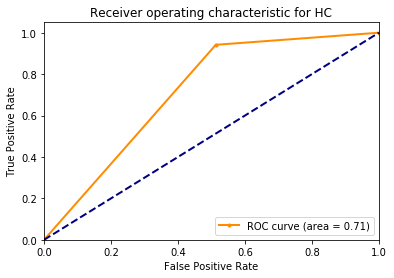

In [15]:
from matplotlib import pyplot
plt.figure()
lw = 2
plt.plot(fpr, tpr,  marker='.', color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for {}'.format(labelnames_string[1]))
plt.legend(loc="lower right")
plt.show()

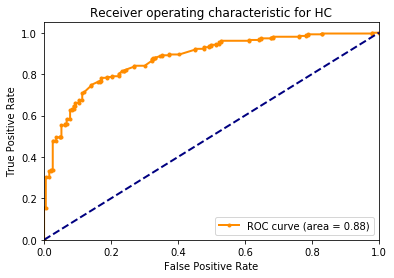

In [16]:
# Plot the ROC curve with original probabilistic predictions

y_not_rounded_pred = pd.Series(notrounded_list)
fpr, tpr, thresholds = metrics.roc_curve(y_actu.astype(int), y_not_rounded_pred)

# calculate AUC
auc = metrics.roc_auc_score(y_actu.astype(int), y_not_rounded_pred)
plt.figure()
lw = 2
plt.plot(fpr, tpr,  marker='.', color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for {}'.format(labelnames_string[1]))
plt.legend(loc="lower right")
plt.show()

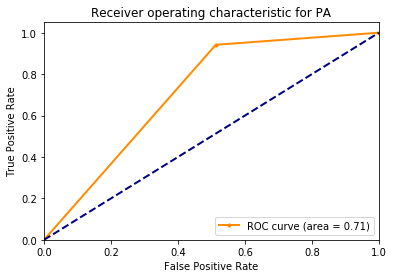

In [17]:
# Plot the ROC curve with rounded predictions for the second class

y_pred[y_pred == labelnames_string[0]] = 1
y_pred[y_pred == labelnames_string[1]] = 0
y_actu[y_actu == labelnames_string[0]] = 1
y_actu[y_actu == labelnames_string[1]] = 0

fpr, tpr, thresholds = metrics.roc_curve(y_actu.astype(int), y_pred.astype(int))
auc = metrics.roc_auc_score(y_actu.astype(int), y_pred.astype(int))

plt.figure()
lw = 2
plt.plot(fpr, tpr,  marker='.', color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for {}'.format(labelnames_string[0]))
plt.legend(loc="lower right")
plt.show()


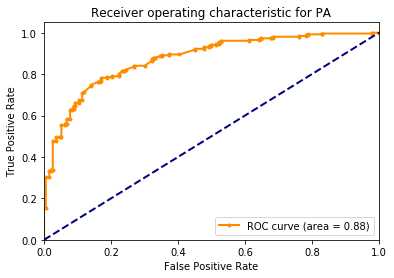

In [18]:
# Plot the ROC curve with probabilistic predictions for the second class

y_not_rounded_pred = pd.Series(notrounded_list)
fpr, tpr, thresholds = metrics.roc_curve(y_actu.astype(int), y_not_rounded_pred)

# calculate AUC
auc = metrics.roc_auc_score(y_actu.astype(int), y_not_rounded_pred)
plt.figure()
lw = 2
plt.plot(fpr, tpr,  marker='.', color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for {}'.format(labelnames_string[0]))
plt.legend(loc="lower right")
plt.show()